In [1]:
import numpy as np
import os
import LDC_interface as ldc
from imantics import Polygons, Mask
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from shapely.geometry import Polygon, Point
fileEx = r'.jpg'
root_path = './Apple'
img_list = [file for file in os.listdir(root_path) if file.endswith(fileEx)]
img_list

FileNotFoundError: [Errno 2] No such file or directory: './Apple'

In [2]:
import cv2

img = cv2.imread("/data/ij/Mosaic_data_augmentation_YOLO/images_ori/1.jpg")

gray1 = cv2.imread("/data/ij/Mosaic_data_augmentation_YOLO/images_ori/1.jpg", 0)


gray2 = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2.imwrite('./tt.jpg', gray2)

diff = cv2.subtract(gray1,gray2)

_, th = cv2.threshold(diff, 0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

images = [gray1, gray2, th]

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(gray2)
plt.show()

NameError: name 'img_color' is not defined

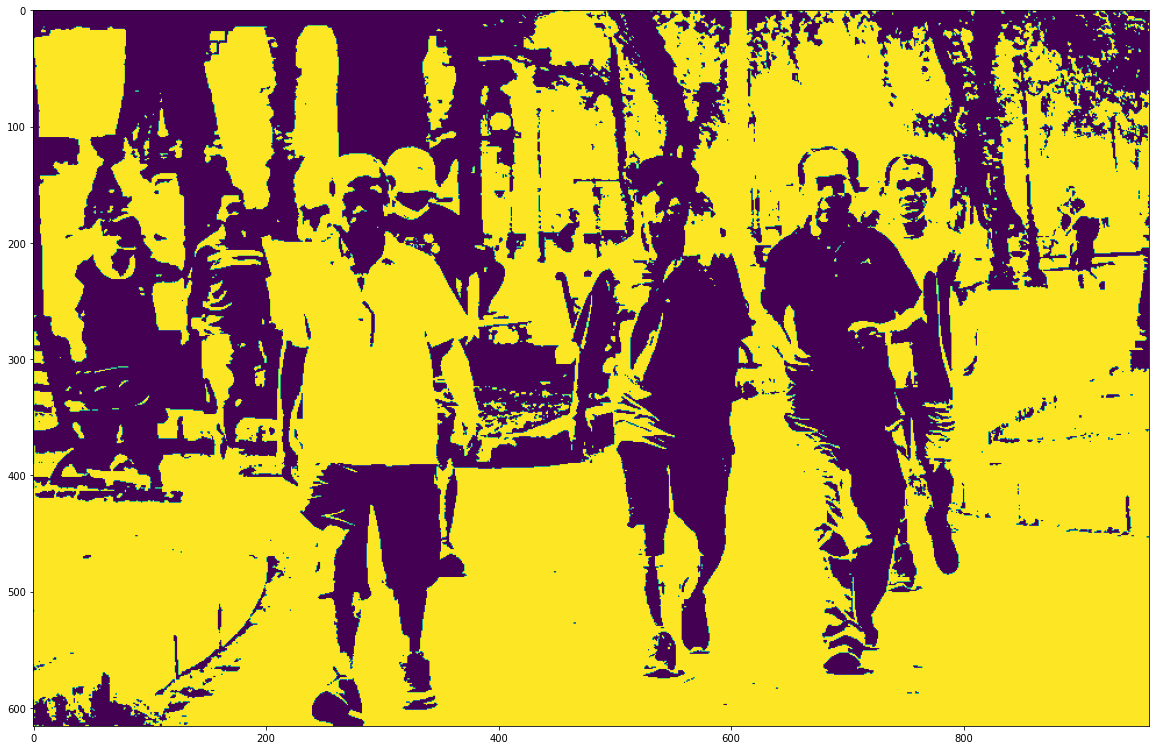

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/data/ij/Mosaic_data_augmentation_YOLO/images_ori/1.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, dst = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('./tt.jpg', dst)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(dst)
plt.show()

In [7]:
dst.shape

(616, 960)

In [ ]:

back_img = cv2.imread("/data/ij/Mosaic_data_augmentation_YOLO/images_ori/1.jpg")

for img_file in img_list : 
    print(img_file)
    img_path = f'{root_path}/{img_file}'
    target_img = cv2.imread(img_path)
    image = cv2.imread(img_path)
    mask, average = ldc.main(img_path)
    polygons = Mask(mask).polygons()
    polygon_list = []
    for seg in polygons.segmentation: 
        if len(seg) > 3:
            polygon_list.append(seg)
            
    for idx, polygon in enumerate(polygon_list):
#     print('polygon', polygon)
        print(f'idx : {idx}')
        points = np.array(polygon)
        points = points.reshape(int(len(polygon)/2),2)
        pts = np.array(points,np.int32)
        pts = pts.reshape((-1, 1, 2))

        color_np = np.asarray(np.random.choice(range(256), size=3), dtype=np.uint8)
        color_fill = (color_np[0].item(),color_np[1].item(),color_np[2].item())

        isClosed = True
        color = (255, 0, 0)
        thickness = 3
        line_image = cv2.polylines(image, [pts], isClosed, color_fill, thickness)
        f = plt.figure()
        f.set_figwidth(5)
        f.set_figheight(5)
        plt.imshow(line_image)
        plt.show()
    
#     polygon_list = polygon_list[:-1]
    
    
    
    
#     for idx, a in enumerate(polygon_list):
#         poly_points = [(a[i], a[i+1]) for i in range(0, len(a), 2)]
#         if len(poly_points) < 3 : 
#             continue
#         polygon = Polygon(poly_points)

#         height, width = mask.shape
#         for y in range(height):
#             for x in range(width):
#                 if polygon.contains(Point(x, y)):
#                     mask[y, x] = 0
    

    
    
#     mask_inv = cv2.bitwise_not(mask)
#     mask_inv
    
#     height1, width1 = target_img.shape[:2]
#     height2, width2 = back_img.shape[:2]
#     x = (width2 - width1)//2
#     y = height2 - height1
#     w = x + width1
#     h = y + height1
    
#     roi = back_img[y:h, x:w]
#     fg = cv2.bitwise_and(target_img, target_img, mask=mask_inv)
#     bg = cv2.bitwise_and(roi, roi, mask=mask)
#     back_img[y:h, x:w] = fg + bg
    
#     f = plt.figure()
#     f.set_figwidth(20)
#     f.set_figheight(15)
#     plt.imshow(back_img)
#     plt.show()
    
    break
